<a href="https://colab.research.google.com/github/RomaZhm/ColabNotes/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%96%D0%BC%D1%83%D1%80%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install psycopg2

In [ ]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from contextlib import closing
pg_connection = { "host": "168.119.252.246", "port": 5432, "dbname": "wazzup_data_mart", "user": "intern", "password": "intern123" }

In [ ]:
with closing(psycopg2.connect(user=pg_connection["user"], 
                              password=pg_connection["password"], 
                              host=pg_connection["host"], 
                              database=pg_connection["dbname"], 
                              port = pg_connection["port"])) as conn:
    with conn.cursor() as cursor:
        cursor.execute('SELECT * FROM test_task_billing')
        col_names = []
        for elt in cursor.description:
            col_names.append(elt[0])
        print(col_names)

['accountid', 'datetime', 'object', 'transaction']


In [ ]:
def query(pg_connection, qText):
    with closing(psycopg2.connect(user=pg_connection["user"], 
                                  password=pg_connection["password"], 
                                  host=pg_connection["host"], 
                                  database=pg_connection["dbname"], 
                                  port = pg_connection["port"])) as conn:
        with conn.cursor() as cursor:
            cursor.execute(qText)
            return cursor.fetchall()

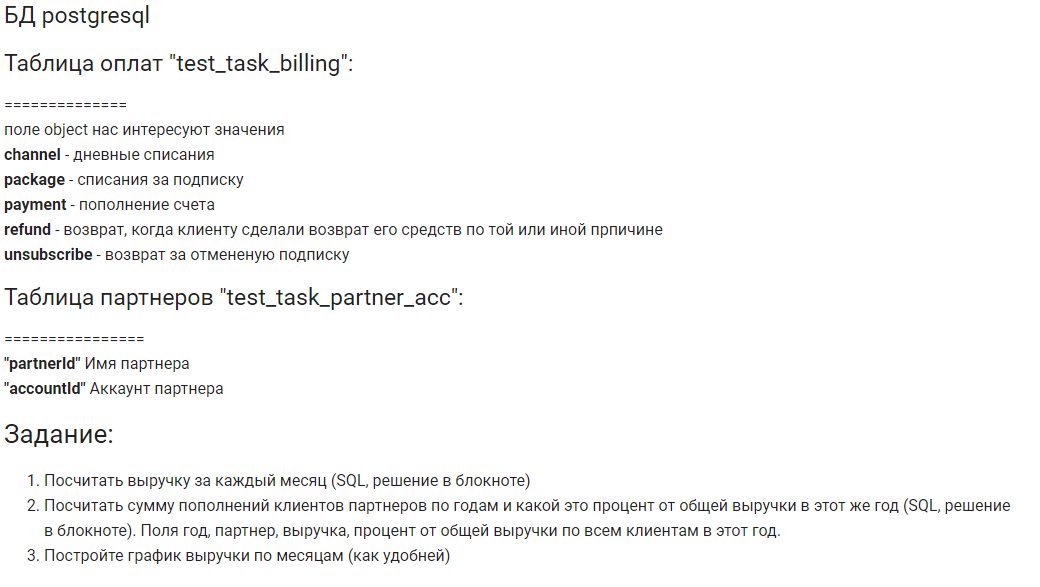

# Задание 1

In [ ]:
text = '''SELECT to_char(to_date(received.month::text, 'MM'), 'Month'), floor(received.year::numeric), round(coalesce(sum1, 0) - coalesce(sum2, 0)) FROM 
((SELECT extract(month from datetime) AS month, extract(year from datetime) AS year, sum(abs(transaction)) AS sum1 
        FROM test_task_billing 
        WHERE object IN ('channel', 'package')
        GROUP BY year, month) AS received 
FULL JOIN
(SELECT extract(month from datetime) AS month, extract(year from datetime) AS year, sum(abs(transaction)) AS sum2
        FROM test_task_billing 
        WHERE object IN ('refund', 'unsubscribe')
        GROUP BY year, month) AS lost 
ON (received.month = lost.month AND received.year = lost.year))'''
res = query(pg_connection = pg_connection, qText = text)
print('Month:    | Year: | Proceeds:')
for row in res:
    print(row[0], '|', row[1], ' |', row[2])

Month:    | Year: | Proceeds:
January   | 2018  | 38.0
February  | 2018  | 612.0
March     | 2018  | 8364.0
April     | 2018  | 11887.0
May       | 2018  | 16970.0
June      | 2018  | 21211.0
July      | 2018  | 17191.0
August    | 2018  | 15930.0
September | 2018  | 14162.0
October   | 2018  | 20801.0
November  | 2018  | 27684.0
December  | 2018  | 36175.0
January   | 2019  | 38062.0
February  | 2019  | 43430.0
March     | 2019  | 63019.0
April     | 2019  | 73465.0
May       | 2019  | 82946.0
June      | 2019  | 80649.0
July      | 2019  | 94772.0
August    | 2019  | 111120.0
September | 2019  | 172292.0
October   | 2019  | 199652.0
November  | 2019  | 229571.0
December  | 2019  | 291103.0
January   | 2020  | 297248.0
February  | 2020  | 382850.0
March     | 2020  | 431646.0
April     | 2020  | 414990.0
May       | 2020  | 557254.0
June      | 2020  | 744707.0
July      | 2020  | 722266.0
August    | 2020  | 727349.0
September | 2020  | 854575.0
October   | 2020  | 1059370.0
November

# Задание 2

In [ ]:
text ='''SELECT floor(byPartner.year::numeric), byPartner.partnerName, round(byPartner.sumP::numeric, 2), round((byPartner.sumP / byYear.total * 100)::numeric, 4) as percentage FROM 
(SELECT extract(year from billings.datetime) AS year, partners.partnerId AS partnerName, sum(transaction) AS sumP
    FROM test_task_billing AS billings JOIN 
    test_task_partner_acc AS partners ON (billings.accountid = partners.accountid)
    WHERE billings.object = 'payment'
    GROUP BY year, partnerName) byPartner 
JOIN
(SELECT received.year AS year, sum1 - sum2 AS total FROM 
    ((SELECT extract(year from datetime) AS year, sum(abs(transaction)) AS sum1 
        FROM test_task_billing 
        WHERE object IN ('channel', 'package')
        GROUP BY year) AS received 
    FULL JOIN
    (SELECT extract(year from datetime) AS year, sum(abs(transaction)) AS sum2
        FROM test_task_billing 
        WHERE object IN ('refund', 'unsubscribe')
        GROUP BY year) AS lost 
    ON (received.year = lost.year)) ) AS byYear
ON byYear.year = byPartner.year '''
res = query(pg_connection = pg_connection, qText = text)
print('Year:| Partner:| Payment: | Percentage of annual proceeds:')
for row in res:
    print(row[0], '|', row[1], '  | ', row[2], '  |', row[3], '%')

Year:| Partner:| Payment: | Percentage of annual proceeds:
2018 | 11195   |  294.00   | 0.1539 %
2018 | 12249   |  938.40   | 0.4912 %
2018 | 12563   |  64.80   | 0.0339 %
2018 | 14219   |  600.00   | 0.3141 %
2018 | 15326   |  300.00   | 0.1570 %
2018 | 15747   |  610.80   | 0.3197 %
2018 | 17858   |  144.00   | 0.0754 %
2018 | 19031   |  144.00   | 0.0754 %
2018 | 24165   |  6.00   | 0.0031 %
2018 | 24792   |  1200.00   | 0.6282 %
2018 | 25469   |  600.00   | 0.3141 %
2018 | 27744   |  444.00   | 0.2324 %
2018 | 28124   |  288.00   | 0.1508 %
2018 | 28435   |  726.00   | 0.3801 %
2018 | 31263   |  995.23   | 0.5210 %
2018 | 31766   |  300.00   | 0.1570 %
2018 | 37328   |  144.00   | 0.0754 %
2018 | 39037   |  444.00   | 0.2324 %
2018 | 39967   |  144.00   | 0.0754 %
2018 | 42293   |  444.00   | 0.2324 %
2018 | 44534   |  852.00   | 0.4460 %
2018 | 44549   |  600.00   | 0.3141 %
2018 | 45961   |  732.00   | 0.3832 %
2018 | 47406   |  144.00   | 0.0754 %
2018 | 47629   |  144.00   | 0.

# Задание 3

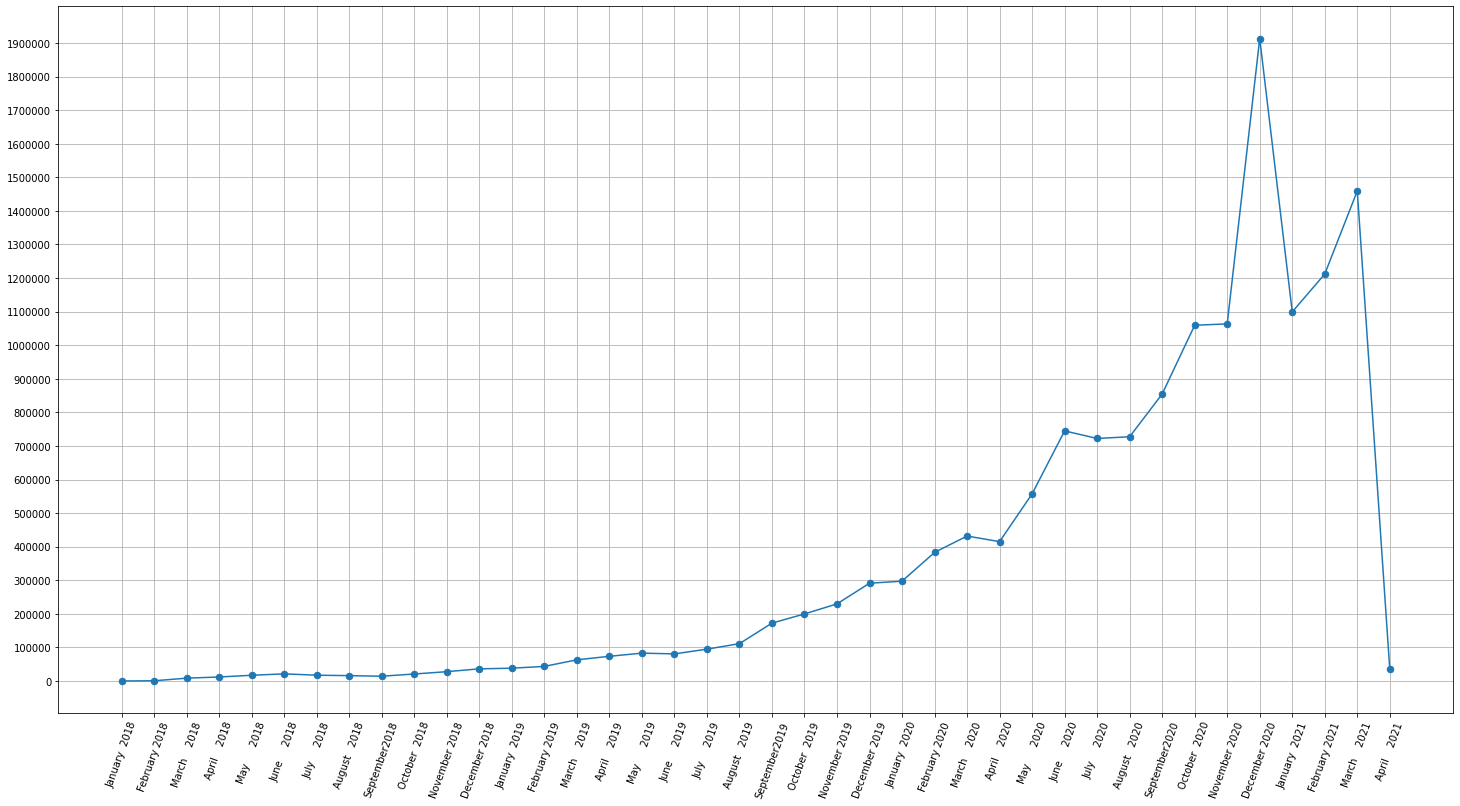

In [ ]:
text = '''SELECT to_char(to_date(received.month::text, 'MM'), 'Month'), floor(received.year::numeric), round(coalesce(sum1, 0) - coalesce(sum2, 0)) FROM 
((SELECT extract(month from datetime) AS month, extract(year from datetime) AS year, sum(abs(transaction)) AS sum1 
        FROM test_task_billing 
        WHERE object IN ('channel', 'package')
        GROUP BY year, month) AS received 
FULL JOIN
(SELECT extract(month from datetime) AS month, extract(year from datetime) AS year, sum(abs(transaction)) AS sum2
        FROM test_task_billing 
        WHERE object IN ('refund', 'unsubscribe')
        GROUP BY year, month) AS lost 
ON (received.month = lost.month AND received.year = lost.year))'''
res = query(pg_connection = pg_connection, qText = text)
date = []
proceed = []
for month, year, proceeds in res:
    date.append(month + str(year))
    proceed.append(int(proceeds))

data = pd.Series(data = proceed, index = date)

fig, ax = plt.subplots(figsize = (25, 13))
data.plot(marker='.', ms = 13)
index = np.arange(len(date))
ax.ticklabel_format(axis = 'y', style='plain')
ax.set_xticks(index)
ax.set_xticklabels(date, rotation = 70)
plt.yticks(np.arange(0, 2000000, 100000))
ax.grid()
plt.show()